In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import warnings
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from numpy import nan
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning
from sklearn.datasets import make_regression
from pandas import read_csv

In [3]:
dt = pd.read_csv('https://raw.githubusercontent.com/specolombiahackathon/202104/main/AVANZADO/adv_train_prod_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/specolombiahackathon/202104/main/AVANZADO/adv_test_prod_data.csv')
print('Training data')
print(df.isnull().sum())
print(df.shape)
print('Test data')
print(dt.isnull().sum())
print(dt.shape)

Training data
CASENAME    0
TIME        0
BOPD        0
BWPD        0
MMSCFD      0
x           0
dtype: int64
(10146, 6)
Test data
CASENAME    0
TIME        0
BOPD        0
BWPD        0
MMSCFD      0
dtype: int64
(230218, 5)


In [4]:

df.describe()

,TIME,BOPD,BWPD,MMSCFD,x
count,10146.000000,10146.000000,10146.000000,10146.000000,10146.000000
mean,34.539129,24358.745536,6621.357711,10.211482,0.147188
std,25.847475,32561.563960,23185.342856,38.669863,0.031064
min,1.000000,390.966619,0.000000,0.012006,0.090748
25%,14.000000,5401.069680,0.107905,0.531568,0.120503
50%,29.000000,12777.072487,12.738063,1.506564,0.144105
75%,50.000000,28008.370859,587.519292,5.057754,0.176171
max,128.000000,275073.370446,254602.793651,512.097225,0.196893


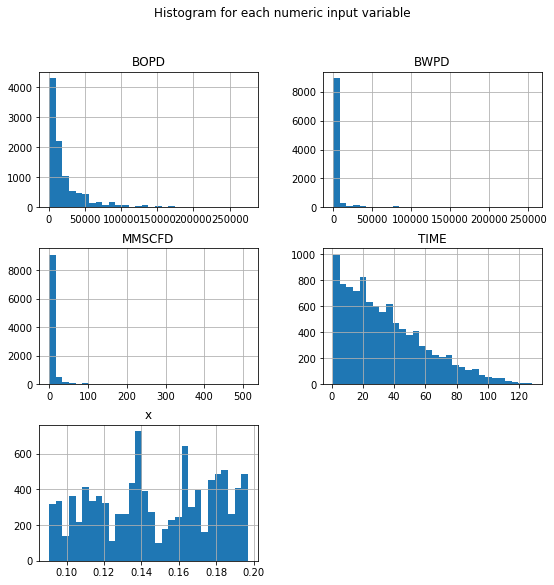

In [5]:
df.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('field_hist')
plt.show()

In [7]:
feature_names = ['BOPD', 'BWPD', 'MMSCFD']
X = df[feature_names]
y = df['x']


In [8]:
X_train = X
y_train = y
X_test = dt[feature_names]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[0.14491439 0.14491677 0.1449247  ... 0.17060817 0.15731486 0.14368142]


In [13]:
dt['x'] = y_pred 

In [14]:
dt.to_csv('JUAN_CEBALLOS_x_v00.csv', index=False)